In [2]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# Constants
MAX_WORDS = 10000  # Consider only the top 10,000 most common words
MAX_LEN = 200  # Maximum sequence length
EMBEDDING_DIM = 100  # Dimension of the word embeddings
EPOCHS = 5
BATCH_SIZE = 128

We will be using the keras imdb dataset, which has already been pre-processed into a list of words, each represented by a token. Every review in the dataset has been assigned a sentiment: positive or negative.

In [4]:
# Loading IMDB dataset
# Pre-split into training and testing
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

In [5]:
# Words in the first sentence
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
# Sentiment of first sentence
print(y_train[0])

1


In [7]:
# Padding sequences to ensure uniform length
# This is necessary for batch training
X_train = pad_sequences(X_train, maxlen=MAX_LEN)
X_test = pad_sequences(X_test, maxlen=MAX_LEN)

In [8]:
# Building Simple RNN model
def build_simple_rnn():
    model = Sequential([
        # Embedding turns input sentences into a vector (this is learned during training)
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN), 
        # Build a simple RNN with 64 neurons
        SimpleRNN(64),
        # Output layer to predict sentiment
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Training the Simple RNN
simple_rnn_model = build_simple_rnn()
simple_rnn_history = simple_rnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 20s 124ms/step - loss: 0.6609 - accuracy: 0.5839 - val_loss: 0.4986 - val_accuracy: 0.7668
Epoch 2/5
157/157 [==============================] - 21s 134ms/step - loss: 0.4812 - accuracy: 0.7739 - val_loss: 0.4668 - val_accuracy: 0.7886
Epoch 3/5
157/157 [==============================] - 22s 140ms/step - loss: 0.3912 - accuracy: 0.8245 - val_loss: 0.4574 - val_accuracy: 0.7934
Epoch 4/5
157/157 [==============================] - 19s 124ms/step - loss: 0.2505 - accuracy: 0.9043 - val_loss: 0.5597 - val_accuracy: 0.7432
Epoch 5/5
157/157 [==============================] - 18s 117ms/step - loss: 0.1207 - accuracy: 0.9620 - val_loss: 0.5341 - val_accuracy: 0.7954


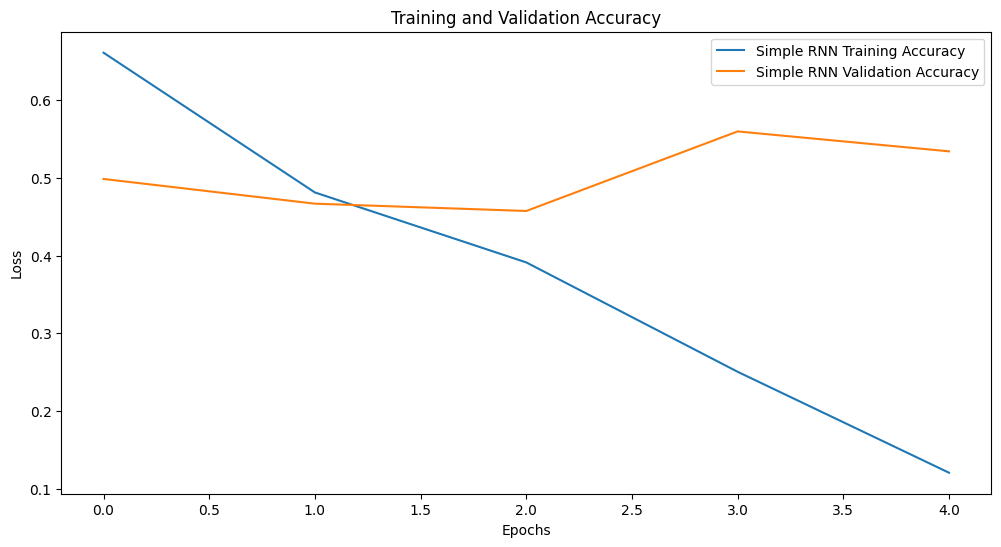

In [10]:
# Plotting training loss
plt.figure(figsize=(12, 6))
plt.plot(simple_rnn_history.history['loss'], label='Simple RNN Training Accuracy')
plt.plot(simple_rnn_history.history['val_loss'], label='Simple RNN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Building LSTM model
# Same architecture, but with LSTM
def build_lstm():
    model = Sequential([
        Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Training LSTM
lstm_model = build_lstm()
lstm_history = lstm_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 53s 325ms/step - loss: 0.4463 - accuracy: 0.7835 - val_loss: 0.3171 - val_accuracy: 0.8736
Epoch 2/5
157/157 [==============================] - 53s 339ms/step - loss: 0.2306 - accuracy: 0.9114 - val_loss: 0.3091 - val_accuracy: 0.8696
Epoch 3/5
157/157 [==============================] - 53s 338ms/step - loss: 0.1627 - accuracy: 0.9416 - val_loss: 0.3797 - val_accuracy: 0.8570
Epoch 4/5
157/157 [==============================] - 48s 309ms/step - loss: 0.1211 - accuracy: 0.9595 - val_loss: 0.3666 - val_accuracy: 0.8632
Epoch 5/5
157/157 [==============================] - 48s 307ms/step - loss: 0.0941 - accuracy: 0.9684 - val_loss: 0.5221 - val_accuracy: 0.8616


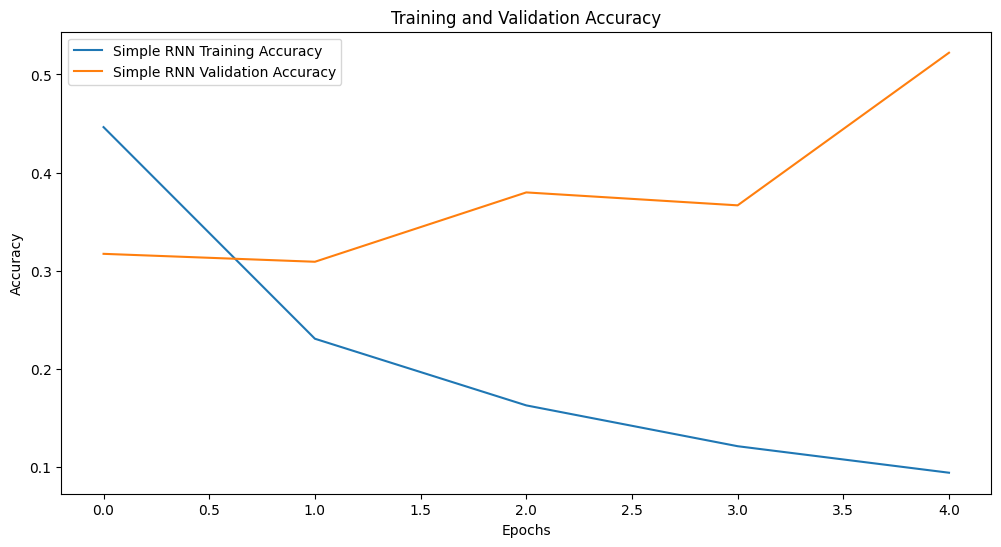

In [13]:
# Plotting training loss
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Simple RNN Training Accuracy')
plt.plot(lstm_history.history['val_loss'], label='Simple RNN Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()